<a href="https://colab.research.google.com/github/akash99955/Wine-Quality-prediction/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# ============================================================
# WINE QUALITY PREDICTION (BINARY) - FULL PIPELINE (CLEAN FORMAT)
# Models: Logistic Regression, Random Forest, SVM, One Neural Network
# Target: 0 = Poor Quality, 1 = Good Quality
# ============================================================

# ---------- Install dependencies (silent) ----------
!pip install -q pandas numpy scikit-learn matplotlib seaborn tensorflow

# ============================================================
# PART 1: SETUP + IMPORTS (FULL WORKING, CLEAN FORMAT)
# ============================================================

# 1) DATA + UTILITIES
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 2) VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

# 3) SKLEARN (CLASSIC ML)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve, average_precision_score,
    f1_score, precision_score, recall_score
)

# 4) NEURAL NETWORK (TENSORFLOW / KERAS)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# -----------------------------
# Style settings (like your format)
# -----------------------------
plt.style.use("ggplot")
sns.set_theme(style="whitegrid", context="notebook")
sns.set_palette("Set2")
plt.rcParams["figure.dpi"] = 110

# -----------------------------
# Reproducibility
# -----------------------------
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

print(" All libraries imported successfully!")



 All libraries imported successfully!


In [7]:
# ============================================================
# PART 2: LOAD DATASET
# ============================================================

# ---------- 1) Load datasets ----------
df_red = pd.read_csv("winequality-red.csv", delimiter=";")
df_white = pd.read_csv("winequality-white.csv", delimiter=";")
print(f" Red wine dataset  → {df_red.shape[0]:,} rows, {df_red.shape[1]} columns")
print(f" White wine dataset→ {df_white.shape[0]:,} rows, {df_white.shape[1]} columns")

# ---------- 2) Merge datasets ----------
df = pd.concat([df_red, df_white], ignore_index=True)

print(f"\n Combined dataset loaded → {df.shape[0]:,} samples")
print(f" Columns ({len(df.columns)}): {df.columns.tolist()}")

df["quality_label"] = (df["quality"] >= 7).astype(int)

# ---------- 4) Count each class safely ----------
quality_counts = df["quality_label"].value_counts(dropna=False)

poor_count = int(quality_counts.get(0, 0))
good_count = int(quality_counts.get(1, 0))

print("\n Wine Quality Distribution (numeric labels):")
print(f"   Poor Quality (0): {poor_count:,}")
print(f"   Good Quality (1): {good_count:,}")

# ---------- 5) Dataset preview ----------
print("\n Sample rows from combined dataset:")
display(df.head())

# ---------- 6) Unique values + missing values summary ----------
unique_summary = (
    pd.DataFrame({
        "Column Name": df.columns,
        "Unique Values": [df[col].nunique(dropna=True) for col in df.columns],
        "Missing Values": [df[col].isna().sum() for col in df.columns],
        "Data Type": [df[col].dtype for col in df.columns]
    })
    .sort_values("Unique Values", ascending=False)
    .reset_index(drop=True)
)
print("\n Unique Values Summary (with missing values & data types):")
display(unique_summary)


 Red wine dataset  → 1,599 rows, 12 columns
 White wine dataset→ 4,898 rows, 12 columns

 Combined dataset loaded → 6,497 samples
 Columns (12): ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

 Wine Quality Distribution (numeric labels):
   Poor Quality (0): 5,220
   Good Quality (1): 1,277

 Sample rows from combined dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0



 Unique Values Summary (with missing values & data types):


,Column Name,Unique Values,Missing Values,Data Type
0,density,998,0,float64
1,residual sugar,316,0,float64
2,total sulfur dioxide,276,0,float64
3,chlorides,214,0,float64
4,volatile acidity,187,0,float64
5,free sulfur dioxide,135,0,float64
6,sulphates,111,0,float64
7,alcohol,111,0,float64
8,pH,108,0,float64
9,fixed acidity,106,0,float64


In [8]:
# chek the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  quality_label         6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [9]:
# checking the missing value of the data
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [10]:
# Checking the dublicate data
df.duplicated().sum()

np.int64(1179)

In [11]:
#delete the dublicate data
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
#checking the imbalance of data
target_distribution = df['quality'].value_counts()
print(target_distribution)

quality
6    2323
5    1751
7     855
4     206
8     148
3      30
9       5
Name: count, dtype: int64


In [14]:
# calculate the class ratio of imbalance data
class_ratio = target_distribution / len(df)*100
print(class_ratio)

quality
6    43.681835
5    32.925912
7    16.077473
4     3.873637
8     2.783001
3     0.564122
9     0.094020
Name: count, dtype: float64


In [15]:
# Adding missing values to 5 different rows in different columns
df.loc[10, 'fixed acidity'] = np.nan
df.loc[25, 'volatile acidity'] = np.nan
df.loc[42, 'citric acid'] = np.nan
df.loc[67, 'residual sugar'] = np.nan
df.loc[89, 'chlorides'] = np.nan
df.loc[105, 'free sulfur dioxide'] = np.nan
df.loc[150, 'total sulfur dioxide'] = np.nan
df.loc[200, 'density'] = np.nan
df.loc[250, 'pH'] = np.nan
df.loc[300, 'sulphates'] = np.nan
df.loc[350, 'alcohol'] = np.nan

In [16]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,0.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0,0.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,0.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,1.0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6.0,0.0


In [17]:
# For numeric wine features:
df['fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].mean()).round(2)
df['volatile acidity'] = df['volatile acidity'].fillna(df['volatile acidity'].mean()).round(2)
df['citric acid'] = df['citric acid'].fillna(df['citric acid'].mean()).round(2)
df['residual sugar'] = df['residual sugar'].fillna(df['residual sugar'].mean()).round(2)
df['chlorides'] = df['chlorides'].fillna(df['chlorides'].mean()).round(2)
df['free sulfur dioxide'] = df['free sulfur dioxide'].fillna(df['free sulfur dioxide'].mean()).round(2)
df['total sulfur dioxide'] = df['total sulfur dioxide'].fillna(df['total sulfur dioxide'].mean()).round(2)
df['density'] = df['density'].fillna(df['density'].mean()).round(3)  # 3 decimals for density
df['pH'] = df['pH'].fillna(df['pH'].mean()).round(2)
df['sulphates'] = df['sulphates'].fillna(df['sulphates'].mean()).round(2)
df['alcohol'] = df['alcohol'].fillna(df['alcohol'].mean()).round(2)


In [18]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,0.998,3.51,0.56,9.40,5.0,0.0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,0.997,3.20,0.68,9.80,5.0,0.0
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,0.997,3.26,0.65,9.80,5.0,0.0
3,11.20,0.28,0.56,1.90,0.08,17.00,60.00,0.998,3.16,0.58,9.80,6.0,0.0
5,7.40,0.66,0.00,1.80,0.08,13.00,40.00,0.998,3.51,0.56,9.40,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493,6.60,0.32,0.36,8.00,0.05,57.00,168.00,0.995,3.15,0.46,9.60,5.0,0.0
6494,6.50,0.24,0.19,1.20,0.04,30.00,111.00,0.993,2.99,0.46,9.40,6.0,0.0
6495,5.50,0.29,0.30,1.10,0.02,20.00,110.00,0.989,3.34,0.38,12.80,7.0,1.0
6496,6.00,0.21,0.38,0.80,0.02,22.00,98.00,0.989,3.26,0.32,11.80,6.0,0.0


In [19]:
# Create the category series directly
wine_categories = pd.Series(index=df.index, dtype='object')
wine_categories.loc[df['quality'] >= 7] = 'Good Quality'
wine_categories.loc[df['quality'] < 7] = 'Poor Quality'

# Count the categories
category_counts = wine_categories.value_counts()
print(category_counts)

Poor Quality    4310
Good Quality    1008
Name: count, dtype: int64


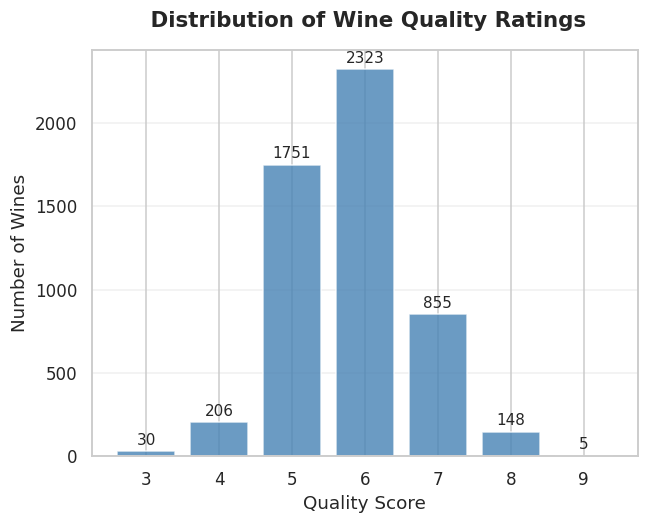

In [20]:
# Quality Distribution
ax1 = plt.subplot(1, 1, 1)
quality_counts = df['quality'].value_counts().sort_index()
bars = ax1.bar(quality_counts.index, quality_counts.values, color='steelblue', alpha=0.8)
ax1.set_title(' Distribution of Wine Quality Ratings', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Quality Score', fontsize=12)
ax1.set_ylabel('Number of Wines', fontsize=12)
ax1.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)


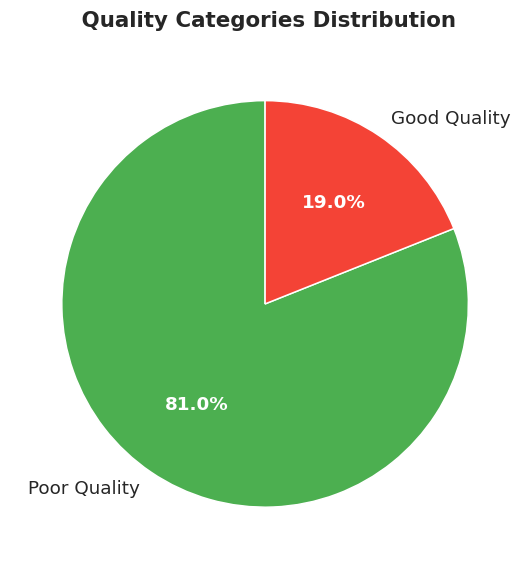

In [21]:
# Quality Categories Pie Chart
plt.figure(figsize=(6,6)) # Create a new figure for this plot
ax2 = plt.subplot(1, 1, 1) # Use a single subplot for this figure
category_counts = wine_categories.value_counts()
colors = ['#4CAF50', '#F44336']
wedges, texts, autotexts = ax2.pie(category_counts.values, labels=category_counts.index,
                                   autopct='%1.1f%%', colors=colors, startangle=90,
                                   textprops={'fontsize': 12})
ax2.set_title(' Quality Categories Distribution', fontsize=14, fontweight='bold', pad=15)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

Text(0.5, 1.0, ' Feature Correlation Matrix')

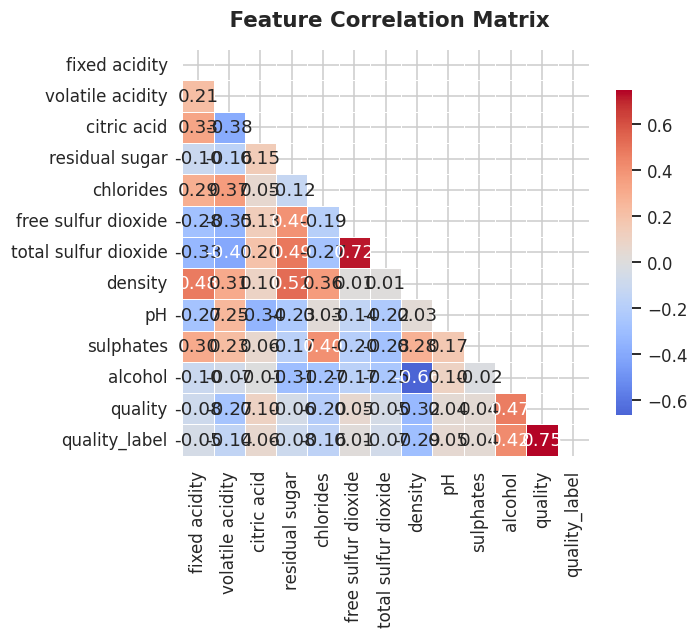

In [22]:
# Feature Correlation Heatmap
ax3 = plt.subplot(1, 1, 1)
correlation_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax3)
ax3.set_title(' Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=15)


Text(0, 0.5, 'Alcohol (%)')

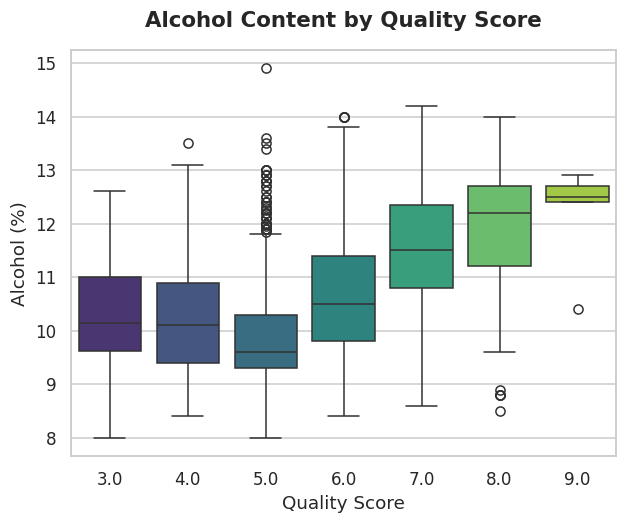

In [23]:
# Alcohol vs Quality Boxplot
ax4 = plt.subplot(1, 1, 1)
sns.boxplot(x='quality', y='alcohol', data=df, palette='viridis', ax=ax4)
ax4.set_title('Alcohol Content by Quality Score', fontsize=14, fontweight='bold', pad=15)
ax4.set_xlabel('Quality Score', fontsize=12)
ax4.set_ylabel('Alcohol (%)', fontsize=12)

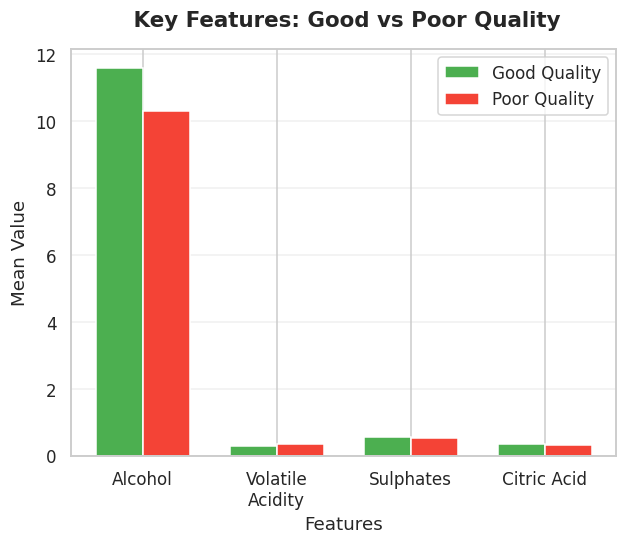

In [24]:
# Key Features Comparison by Quality Category
ax5 = plt.subplot(1, 1, 1)
df['quality_category'] = wine_categories # Assign the series as a column
features_to_compare = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']
feature_means = df.groupby('quality_category')[features_to_compare].mean()
x = np.arange(len(features_to_compare))
width = 0.35
bars1 = ax5.bar(x - width/2, feature_means.loc['Good Quality'], width, label='Good Quality', color='#4CAF50')
bars2 = ax5.bar(x + width/2, feature_means.loc['Poor Quality'], width, label='Poor Quality', color='#F44336')
ax5.set_title(' Key Features: Good vs Poor Quality', fontsize=14, fontweight='bold', pad=15)
ax5.set_xlabel('Features', fontsize=12)
ax5.set_ylabel('Mean Value', fontsize=12)
ax5.set_xticks(x)
ax5.set_xticklabels(['Alcohol', 'Volatile\nAcidity', 'Sulphates', 'Citric Acid'])
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

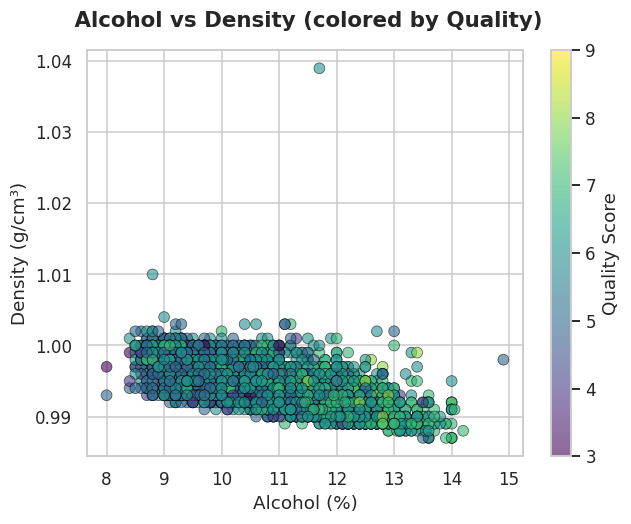

In [25]:
# Scatter: Alcohol vs Density colored by Quality
ax7 = plt.subplot(1, 1, 1)
scatter = ax7.scatter(df['alcohol'], df['density'], c=df['quality'],
                     cmap='viridis', alpha=0.6, s=50, edgecolor='black', linewidth=0.5)
ax7.set_title(' Alcohol vs Density (colored by Quality)', fontsize=14, fontweight='bold', pad=15)
ax7.set_xlabel('Alcohol (%)', fontsize=12)
ax7.set_ylabel('Density (g/cm³)', fontsize=12)
cbar = plt.colorbar(scatter, ax=ax7)
cbar.set_label('Quality Score', fontsize=12)

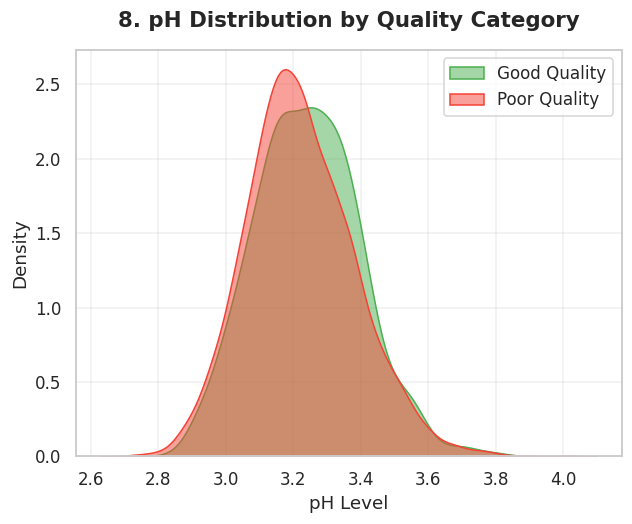

In [26]:
#  pH Distribution by Quality Category
ax8 = plt.subplot(1, 1, 1)
for category, color in zip(['Good Quality', 'Poor Quality'], ['#4CAF50', '#F44336']):
    subset = df[df['quality_category'] == category]
    sns.kdeplot(data=subset['pH'], label=category, fill=True, alpha=0.5, color=color, ax=ax8)
ax8.set_title('8. pH Distribution by Quality Category', fontsize=14, fontweight='bold', pad=15)
ax8.set_xlabel('pH Level', fontsize=12)
ax8.set_ylabel('Density', fontsize=12)
ax8.legend()
ax8.grid(alpha=0.3)

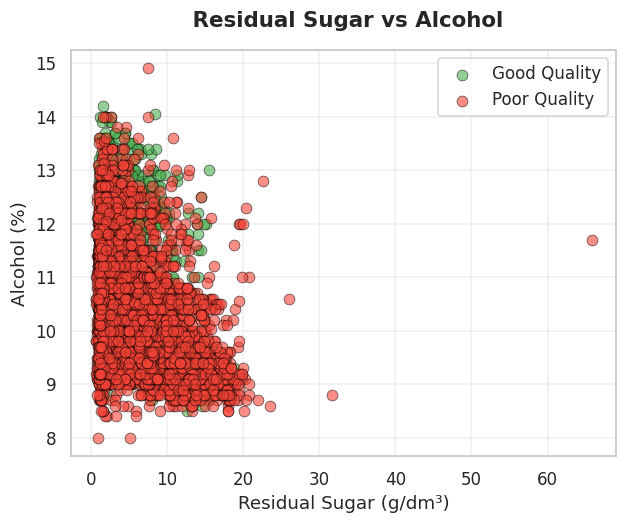

In [27]:
# Residual Sugar vs Alcohol with Quality Categories
ax9 = plt.subplot(1, 1, 1)
good_quality = df[df['quality_category'] == 'Good Quality']
poor_quality = df[df['quality_category'] == 'Poor Quality']
ax9.scatter(good_quality['residual sugar'], good_quality['alcohol'],
           color='#4CAF50', alpha=0.6, s=50, label='Good Quality', edgecolor='black', linewidth=0.5)
ax9.scatter(poor_quality['residual sugar'], poor_quality['alcohol'],
           color='#F44336', alpha=0.6, s=50, label='Poor Quality', edgecolor='black', linewidth=0.5)
ax9.set_title(' Residual Sugar vs Alcohol', fontsize=14, fontweight='bold', pad=15)
ax9.set_xlabel('Residual Sugar (g/dm³)', fontsize=12)
ax9.set_ylabel('Alcohol (%)', fontsize=12)
ax9.legend()
ax9.grid(alpha=0.3)


=== Dataset Shape ===
Total samples: 5319, Features: 14

=== Class Distribution (quality_label) ===
quality_label
0.0    4310
1.0    1008
Name: count, dtype: int64
Percentage of 'Good' wines: 19.0%


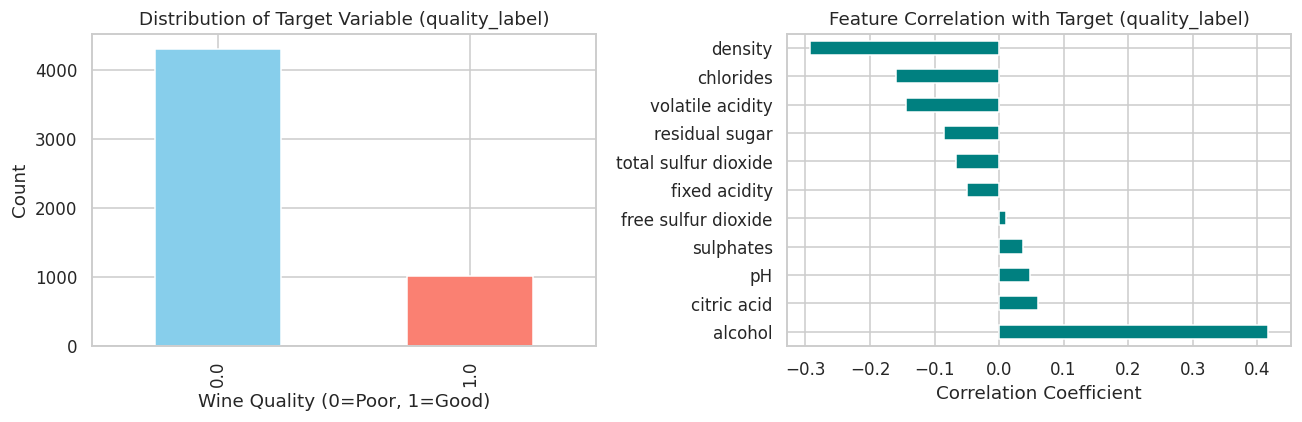

In [28]:
# 2. EXPLORATORY DATA ANALYSIS (EDA)
# ------------------------------------------------------------
print("=== Dataset Shape ===")
print(f"Total samples: {df.shape[0]}, Features: {df.shape[1]}")
print(f"\n=== Class Distribution (quality_label) ===")
print(df['quality_label'].value_counts())
print(f"Percentage of 'Good' wines: {(df['quality_label'].mean()*100):.1f}%")

# Plot the class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
df['quality_label'].value_counts().plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Distribution of Target Variable (quality_label)')
ax1.set_xlabel('Wine Quality (0=Poor, 1=Good)')
ax1.set_ylabel('Count')

# Calculate and plot feature correlation with the target
# Ensure only numeric columns are used for correlation calculation.
# Then select correlations with 'quality_label' and remove self-correlation and correlation with 'quality'.
correlations = df.corr(numeric_only=True)['quality_label'].drop('quality_label', errors='ignore')
correlations = correlations.drop('quality', errors='ignore') # Exclude original 'quality' score
correlations = correlations.sort_values(ascending=False)

correlations.plot(kind='barh', ax=ax2, color='teal')
ax2.set_title('Feature Correlation with Target (quality_label)')
ax2.set_xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [29]:
# ============================================================
# PART 5: BALANCE DATASET + TRAIN/TEST SPLIT (CLEAN FORMAT)
# WINE QUALITY PREDICTION (GOOD vs POOR)
# ============================================================

print("\n Preparing a balanced training dataset...")


# ---------- 1) Check class counts ----------
class_counts = df["quality_label"].value_counts().sort_index()
min_per_class = int(class_counts.min())

print("\nClass counts (before balancing):")
label_names = {0: "Poor Quality", 1: "Good Quality"}
for label, cnt in class_counts.items():
    print(f"  {label} ({label_names[label]}): {cnt:,}")

print(f"\nBalancing to {min_per_class:,} samples per class...")


# ---------- 2) Balance each class safely ----------
balanced_data = (
    df.groupby("quality_label", group_keys=False)
      .apply(lambda x: x.sample(n=min_per_class, random_state=42))
      .sample(frac=1, random_state=42)   # shuffle dataset
      .reset_index(drop=True)
)

print(f"\n Balanced dataset created: {len(balanced_data):,} wine samples")


balanced_counts = balanced_data["quality_label"].value_counts().sort_index()
print("Balanced class counts:")
for label, cnt in balanced_counts.items():
    print(f"  {label} ({label_names[label]}): {cnt:,}")


# ---------- 3) Train-test split (stratified) ----------
train_df, test_df = train_test_split(
    balanced_data,
    test_size=0.20,
    random_state=42,
    stratify=balanced_data["quality_label"]
)

print("\n Train-Test Split Summary")
print(f"  Train samples: {len(train_df):,}")
print(f"  Test samples : {len(test_df):,}")


train_counts = train_df["quality_label"].value_counts().sort_index()
test_counts  = test_df["quality_label"].value_counts().sort_index()

print("\nTrain distribution:")
for label, cnt in train_counts.items():
    print(f"  {label} ({label_names[label]}): {cnt:,}")

print("\nTest distribution:")
for label, cnt in test_counts.items():
    print(f"  {label} ({label_names[label]}): {cnt:,}")



 Preparing a balanced training dataset...

Class counts (before balancing):
  0.0 (Poor Quality): 4,310
  1.0 (Good Quality): 1,008

Balancing to 1,008 samples per class...

 Balanced dataset created: 2,016 wine samples
Balanced class counts:
  0.0 (Poor Quality): 1,008
  1.0 (Good Quality): 1,008

 Train-Test Split Summary
  Train samples: 1,612
  Test samples : 404

Train distribution:
  0.0 (Poor Quality): 806
  1.0 (Good Quality): 806

Test distribution:
  0.0 (Poor Quality): 202
  1.0 (Good Quality): 202


In [31]:
# 3. DATA PREPARATION FOR MODELING
# ------------------------------------------------------------
# Separate features (X) and target (y).
# Removed 'quality_text' as it does not exist in the DataFrame
X = df.drop(columns=['quality', 'quality_label', 'quality_category'])
y = df['quality_label']

# Drop rows where the target variable 'y' has NaN values
# This ensures that train_test_split does not encounter NaNs in the stratification step.
valid_indices = y.dropna().index
X = X.loc[valid_indices]
y = y.loc[valid_indices]

# Split the data into training (80%) and testing (20%) sets.
# Using 'stratify=y' ensures the class ratio is preserved in both sets, which is crucial for imbalanced data[citation:2].
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features. This is essential for Logistic Regression and SVM.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
import time

# ===================================
# MODEL 1: RANDOM FOREST (WINE QUALITY)
# ===================================
# Task: Binary Classification
# 0 = Poor Quality, 1 = Good Quality

print("\n MODEL 1: RANDOM FOREST (WINE QUALITY)")
print("=" * 60)

# ------------------------------------------------------------
# STEP 1: FEATURE + TARGET SETUP
# ------------------------------------------------------------
print("\n STEP 1: FEATURE + TARGET SETUP")
print("-" * 45)

# Use the balanced train/test you created earlier:
# train_df, test_df  (from PART 5)

# Features = all numeric columns except label columns
drop_cols = ["quality_label"]
if "quality_text" in train_df.columns:
    drop_cols.append("quality_text")
if "quality" in train_df.columns:
    drop_cols.append("quality")   # prevent leakage
# Add 'quality_category' to drop_cols as it is a string column and not a feature
if "quality_category" in train_df.columns:
    drop_cols.append("quality_category")

X_train = train_df.drop(columns=drop_cols)
X_test  = test_df.drop(columns=drop_cols)

y_train = train_df["quality_label"].values
y_true  = test_df["quality_label"].values

print(" Feature matrix prepared!")
print(f"   Train shape: {X_train.shape}")
print(f"   Test shape : {X_test.shape}")
print("   Target classes:", np.unique(y_train))


# ------------------------------------------------------------
# STEP 2: Random Forest Training
# ------------------------------------------------------------
print("\n STEP 2: TRAIN RANDOM FOREST")
print("-" * 45)

rf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features="sqrt",
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

t0 = time.time()
rf.fit(X_train, y_train)
train_time = time.time() - t0

print(f" Random Forest training completed in {train_time:.2f} sec")


# ------------------------------------------------------------
# STEP 3: Predictions
# ------------------------------------------------------------
print("\n STEP 3: PREDICTIONS")
print("-" * 45)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # prob of class 1 (Good)

print(" Predictions generated!")
print(f"   Sample preds : {y_pred_rf[:10]}")
print(f"   Sample probs : {np.round(y_prob_rf[:10], 3)}")


# ------------------------------------------------------------
# STEP 4: Evaluation
# ------------------------------------------------------------
print("\n STEP 4: MODEL EVALUATION")
print("-" * 45)

acc = accuracy_score(y_true, y_pred_rf)
cm  = confusion_matrix(y_true, y_pred_rf)

print(f" Accuracy: {acc:.4f}")
print("\n Classification Report:")
print(classification_report(
    y_true, y_pred_rf,
    target_names=["Poor Quality", "Good Quality"],
    digits=4
))


 MODEL 1: RANDOM FOREST (WINE QUALITY)

 STEP 1: FEATURE + TARGET SETUP
---------------------------------------------
 Feature matrix prepared!
   Train shape: (1612, 11)
   Test shape : (404, 11)
   Target classes: [0. 1.]

 STEP 2: TRAIN RANDOM FOREST
---------------------------------------------
 Random Forest training completed in 7.55 sec

 STEP 3: PREDICTIONS
---------------------------------------------
 Predictions generated!
   Sample preds : [0. 1. 1. 1. 0. 1. 0. 1. 0. 0.]
   Sample probs : [0.453 0.839 0.834 0.595 0.106 0.779 0.105 0.629 0.393 0.498]

 STEP 4: MODEL EVALUATION
---------------------------------------------
 Accuracy: 0.7698

 Classification Report:
              precision    recall  f1-score   support

Poor Quality     0.7978    0.7228    0.7584       202
Good Quality     0.7466    0.8168    0.7801       202

    accuracy                         0.7698       404
   macro avg     0.7722    0.7698    0.7693       404
weighted avg     0.7722    0.7698    0.7693

In [38]:
import time

# ==========================================
# MODEL 2: LOGISTIC REGRESSION (WINE QUALITY)
# ==========================================
# Task: Binary Classification
# 0 = Poor Quality, 1 = Good Quality

print("\n MODEL 2: LOGISTIC REGRESSION (WINE QUALITY)")
print("=" * 60)

# ------------------------------------------------------------
# STEP 1: FEATURE + TARGET SETUP
# ------------------------------------------------------------
print("\n STEP 1: FEATURE + TARGET SETUP")
print("-" * 45)

# Use the balanced train/test you created earlier:
# train_df, test_df  (from PART 5)

# Features = all numeric columns except label columns
drop_cols = ["quality_label"]
if "quality_text" in train_df.columns:
    drop_cols.append("quality_text")
if "quality" in train_df.columns:
    drop_cols.append("quality")   # prevent leakage
# Add 'quality_category' to drop_cols as it is a string column and not a feature
if "quality_category" in train_df.columns:
    drop_cols.append("quality_category")

X_train = train_df.drop(columns=drop_cols)
X_test  = test_df.drop(columns=drop_cols)

y_train = train_df["quality_label"].values
y_true  = test_df["quality_label"].values

print(" Feature matrix prepared!")
print(f"   Train shape: {X_train.shape}")
print(f"   Test shape : {X_test.shape}")
print("   Target classes:", np.unique(y_train))


# ------------------------------------------------------------
# STEP 2: Standard Scaling (IMPORTANT for Logistic Regression)
# ------------------------------------------------------------
print("\n STEP 2: FEATURE SCALING (STANDARD SCALER)")
print("-" * 45)

scaler_lr = StandardScaler()
X_train_lr = scaler_lr.fit_transform(X_train)
X_test_lr  = scaler_lr.transform(X_test)

print(" Scaling done!")
print(f"   Train scaled shape: {X_train_lr.shape}")
print(f"   Test scaled shape : {X_test_lr.shape}")


# ------------------------------------------------------------
# STEP 3: Logistic Regression Training
# ------------------------------------------------------------
print("\n STEP 3: TRAIN LOGISTIC REGRESSION")
print("-" * 45)

lr = LogisticRegression(
    max_iter=3000,
    solver="lbfgs",
    class_weight="balanced",
    random_state=42
)

t0 = time.time()
lr.fit(X_train_lr, y_train)
train_time = time.time() - t0

print(f" Logistic Regression training completed in {train_time:.2f} sec")


# ------------------------------------------------------------
# STEP 4: Predictions
# ------------------------------------------------------------
print("\n STEP 4: PREDICTIONS")
print("-" * 45)

y_pred_lr = lr.predict(X_test_lr)
y_prob_lr = lr.predict_proba(X_test_lr)[:, 1]   # prob of class 1 (Good)

print(" Predictions generated!")
print(f"   Sample preds : {y_pred_lr[:10]}")
print(f"   Sample probs : {np.round(y_prob_lr[:10], 3)}")


# ------------------------------------------------------------
# STEP 5: Evaluation
# ------------------------------------------------------------
print("\n STEP 5: MODEL EVALUATION")
print("-" * 45)

acc = accuracy_score(y_true, y_pred_lr)
cm  = confusion_matrix(y_true, y_pred_lr)

print(f" Accuracy: {acc:.4f}")
print("\n Classification Report:")
print(classification_report(
    y_true, y_pred_lr,
    target_names=["Poor Quality", "Good Quality"],
    digits=4
))




 MODEL 2: LOGISTIC REGRESSION (WINE QUALITY)

 STEP 1: FEATURE + TARGET SETUP
---------------------------------------------
 Feature matrix prepared!
   Train shape: (1612, 11)
   Test shape : (404, 11)
   Target classes: [0. 1.]

 STEP 2: FEATURE SCALING (STANDARD SCALER)
---------------------------------------------
 Scaling done!
   Train scaled shape: (1612, 11)
   Test scaled shape : (404, 11)

 STEP 3: TRAIN LOGISTIC REGRESSION
---------------------------------------------
 Logistic Regression training completed in 0.02 sec

 STEP 4: PREDICTIONS
---------------------------------------------
 Predictions generated!
   Sample preds : [1. 1. 1. 1. 0. 1. 0. 1. 0. 1.]
   Sample probs : [0.647 0.793 0.899 0.64  0.128 0.88  0.226 0.543 0.181 0.67 ]

 STEP 5: MODEL EVALUATION
---------------------------------------------
 Accuracy: 0.7649

 Classification Report:
              precision    recall  f1-score   support

Poor Quality     0.7861    0.7277    0.7558       202
Good Quality    

In [39]:
# ================================
# MODEL 3: SVM (WINE QUALITY)
# ================================
# Task: Binary Classification
# 0 = Poor Quality, 1 = Good Quality

print("\n MODEL 3: SUPPORT VECTOR MACHINE (WINE QUALITY)")
print("=" * 60)

# ------------------------------------------------------------
# STEP 1: FEATURE + TARGET SETUP
# ------------------------------------------------------------
print("\n STEP 1: FEATURE + TARGET SETUP")
print("-" * 45)

# Use the balanced train/test you created earlier:
# train_df, test_df  (from PART 5)

# Features = all numeric columns except label columns
drop_cols = ["quality_label"]
if "quality_text" in train_df.columns:
    drop_cols.append("quality_text")
if "quality" in train_df.columns:
    drop_cols.append("quality")   # prevent leakage
# Add 'quality_category' to drop_cols as it is a string column and not a feature
if "quality_category" in train_df.columns:
    drop_cols.append("quality_category")

X_train = train_df.drop(columns=drop_cols)
X_test  = test_df.drop(columns=drop_cols)

y_train = train_df["quality_label"].values
y_true  = test_df["quality_label"].values

print(" Feature matrix prepared!")
print(f"   Train shape: {X_train.shape}")
print(f"   Test shape : {X_test.shape}")
print("   Target classes:", np.unique(y_train))


# ------------------------------------------------------------
# STEP 2: Feature Scaling (MANDATORY for SVM)
# ------------------------------------------------------------
print("\n STEP 2: FEATURE SCALING (STANDARD SCALER)")
print("-" * 45)

scaler_svm = StandardScaler()
X_train_svm = scaler_svm.fit_transform(X_train)
X_test_svm  = scaler_svm.transform(X_test)

print(" Scaling done!")
print(f"   Train scaled shape: {X_train_svm.shape}")
print(f"   Test scaled shape : {X_test_svm.shape}")


# ------------------------------------------------------------
# STEP 3: SVM Training (RBF Kernel)
# ------------------------------------------------------------
print("\n STEP 3: TRAIN SVM (RBF KERNEL)")
print("-" * 45)

svm = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    probability=True,          # needed for ROC / PR curves
    class_weight="balanced",
    random_state=42
)

t0 = time.time()
svm.fit(X_train_svm, y_train)
train_time = time.time() - t0

print(f" SVM training completed in {train_time:.2f} sec")


# ------------------------------------------------------------
# STEP 4: Predictions
# ------------------------------------------------------------
print("\n STEP 4: PREDICTIONS")
print("-" * 45)

y_pred_svm = svm.predict(X_test_svm)
y_prob_svm = svm.predict_proba(X_test_svm)[:, 1]  # prob of class 1 (Good)

print(" Predictions generated!")
print(f"   Sample preds : {y_pred_svm[:10]}")
print(f"   Sample probs : {np.round(y_prob_svm[:10], 3)}")


# ------------------------------------------------------------
# STEP 5: Evaluation
# ------------------------------------------------------------
print("\n STEP 5: MODEL EVALUATION")
print("-" * 45)

acc = accuracy_score(y_true, y_pred_svm)
cm  = confusion_matrix(y_true, y_pred_svm)

print(f" Accuracy: {acc:.4f}")
print("\n Classification Report:")
print(classification_report(
    y_true, y_pred_svm,
    target_names=["Poor Quality", "Good Quality"],
    digits=4
))





 MODEL 3: SUPPORT VECTOR MACHINE (WINE QUALITY)

 STEP 1: FEATURE + TARGET SETUP
---------------------------------------------
 Feature matrix prepared!
   Train shape: (1612, 11)
   Test shape : (404, 11)
   Target classes: [0. 1.]

 STEP 2: FEATURE SCALING (STANDARD SCALER)
---------------------------------------------
 Scaling done!
   Train scaled shape: (1612, 11)
   Test scaled shape : (404, 11)

 STEP 3: TRAIN SVM (RBF KERNEL)
---------------------------------------------
 SVM training completed in 0.40 sec

 STEP 4: PREDICTIONS
---------------------------------------------
 Predictions generated!
   Sample preds : [1. 1. 1. 1. 0. 1. 0. 1. 0. 1.]
   Sample probs : [0.668 0.829 0.793 0.758 0.151 0.885 0.169 0.588 0.168 0.737]

 STEP 5: MODEL EVALUATION
---------------------------------------------
 Accuracy: 0.7921

 Classification Report:
              precision    recall  f1-score   support

Poor Quality     0.8278    0.7376    0.7801       202
Good Quality     0.7634    0.846

In [46]:
# ================================
# MODEL 4: LSTM (WINE QUALITY)
# ================================
# Task: Binary Classification
# 0 = Poor Quality, 1 = Good Quality

print("\n MODEL 4: LSTM (WINE QUALITY)")
print("=" * 60)

# ------------------------------------------------------------
# STEP 1: FEATURE + TARGET SETUP
# ------------------------------------------------------------
print("\n STEP 1: FEATURE + TARGET SETUP")
print("-" * 45)

# Use the balanced train/test you created earlier:
# train_df, test_df  (from PART 5)

# --- Prepare X, y ---
drop_cols = ["quality_label"]
for col in ["quality_text", "quality", "quality_category"]:
    if col in train_df.columns:
        drop_cols.append(col)

X_train = train_df.drop(columns=drop_cols)
X_test  = test_df.drop(columns=drop_cols)
y_train = train_df["quality_label"].values
y_true  = test_df["quality_label"].values

# --- Scale ---
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# LSTM needs 3D: (samples, timesteps, features_per_step)
# We'll use timesteps = num_features, features_per_step = 1
X_train_lstm = X_train_s.reshape(X_train_s.shape[0], X_train_s.shape[1], 1)
X_test_lstm  = X_test_s.reshape(X_test_s.shape[0], X_test_s.shape[1], 1)

# Add this import statement
from sklearn.utils.class_weight import compute_class_weight

# --- Class weights ---
classes = np.array([0, 1])
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight = {0: float(weights[0]), 1: float(weights[1])}

# --- Build LSTM ---
lstm_model = keras.Sequential([
    layers.Input(shape=(X_train_lstm.shape[1], 1)),

    layers.LSTM(64, return_sequences=False),
    layers.Dropout(0.25),

    layers.Dense(32, activation="relu"),
    layers.Dropout(0.20),

    layers.Dense(1, activation="sigmoid")
])

lstm_model.compile(optimizer=keras.optimizers.Adam(0.001),
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

lstm_model.summary()

# --- Train ---
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True)

t0 = time.time()
history = lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weight,
    callbacks=[early_stop],
    verbose=1
)
print(f"Training time: {time.time()-t0:.2f}s")

# --- Predict + Evaluate ---
y_prob_lstm = lstm_model.predict(X_test_lstm, verbose=0).ravel()
y_pred_lstm = (y_prob_lstm >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_true, y_pred_lstm))
print(confusion_matrix(y_true, y_pred_lstm))
print(classification_report(y_true, y_pred_lstm, target_names=["Poor", "Good"], digits=4))



 MODEL 4: LSTM (WINE QUALITY)

 STEP 1: FEATURE + TARGET SETUP
---------------------------------------------


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6509 - loss: 0.6767 - val_accuracy: 0.6904 - val_loss: 0.6312
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6957 - loss: 0.6124 - val_accuracy: 0.6904 - val_loss: 0.5925
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7011 - loss: 0.5894 - val_accuracy: 0.6904 - val_loss: 0.5828
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7202 - loss: 0.5739 - val_accuracy: 0.6811 - val_loss: 0.5819
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7265 - loss: 0.5727 - val_accuracy: 0.6873 - val_loss: 0.5803
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7179 - loss: 0.5698 - val_accuracy: 0.6873 - val_loss: 0.5799
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7306 - loss: 0.5674 - val_accuracy: 0.6873 - val_loss: 0.5807
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7232 - loss: 0.5722 - val_accuracy: 0.6873 - val_loss


 MODEL 4: NEURAL NETWORK (WINE QUALITY)

 STEP 1: FEATURE + TARGET SETUP
---------------------------------------------
 Feature matrix prepared!
   Train shape: (1612, 11)
   Test shape : (404, 11)
   Target classes: [0. 1.]

 STEP 2: FEATURE SCALING (STANDARD SCALER)
---------------------------------------------
 Scaling done!
   Train scaled shape: (1612, 11)
   Test scaled shape : (404, 11)

 STEP 3: CLASS WEIGHTS (IMBALANCE HANDLING)
---------------------------------------------
 Class weights: {0: np.float64(1.0), 1: np.float64(1.0)}

 STEP 4: BUILD NEURAL NETWORK
---------------------------------------------


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)


 STEP 5: TRAIN NEURAL NETWORK
---------------------------------------------
Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5172 - loss: 0.6979 - val_accuracy: 0.7554 - val_loss: 0.6163
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7291 - loss: 0.5940 - val_accuracy: 0.7554 - val_loss: 0.5676
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7339 - loss: 0.5510 - val_accuracy: 0.7554 - val_loss: 0.5548
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7596 - loss: 0.5396 - val_accuracy: 0.7647 - val_loss: 0.5536
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7545 - loss: 0.5200 - val_accuracy: 0.7492 - val_loss: 0.5536
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7468 - loss: 0.5331 - val_accuracy: 0.7585 - val_loss: 0.5504
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7640 - loss: 0.5347 - val_accuracy: 0.7523 - val_loss: 0.5501
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 

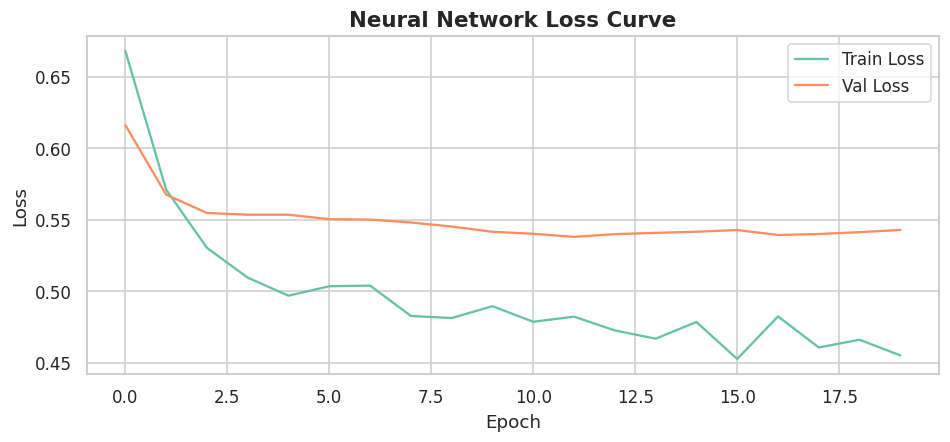

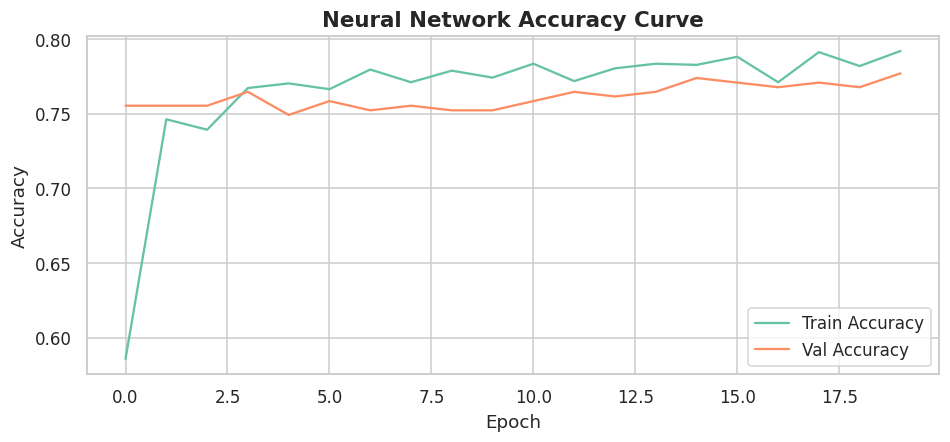

In [42]:
# ================================
# MODEL 4: Artificial NEURAL NETWORK (WINE QUALITY)
# ================================
# Task: Binary Classification
# 0 = Poor Quality, 1 = Good Quality

print("\n MODEL 4: NEURAL NETWORK (WINE QUALITY)")
print("=" * 60)

# ------------------------------------------------------------
# STEP 1: FEATURE + TARGET SETUP
# ------------------------------------------------------------
print("\n STEP 1: FEATURE + TARGET SETUP")
print("-" * 45)

# Use the balanced train/test you created earlier:
# train_df, test_df  (from PART 5)

drop_cols = ["quality_label"]
if "quality_text" in train_df.columns:
    drop_cols.append("quality_text")
if "quality" in train_df.columns:
    drop_cols.append("quality")   # prevent leakage
# Add 'quality_category' to drop_cols as it is a string column and not a feature
if "quality_category" in train_df.columns:
    drop_cols.append("quality_category")

X_train = train_df.drop(columns=drop_cols)
X_test  = test_df.drop(columns=drop_cols)

y_train = train_df["quality_label"].values
y_true  = test_df["quality_label"].values

print(" Feature matrix prepared!")
print(f"   Train shape: {X_train.shape}")
print(f"   Test shape : {X_test.shape}")
print("   Target classes:", np.unique(y_train))


# ------------------------------------------------------------
# STEP 2: Feature Scaling (IMPORTANT for Neural Network)
# ------------------------------------------------------------
print("\n STEP 2: FEATURE SCALING (STANDARD SCALER)")
print("-" * 45)

scaler_nn = StandardScaler()
X_train_nn = scaler_nn.fit_transform(X_train)
X_test_nn  = scaler_nn.transform(X_test)

print(" Scaling done!")
print(f"   Train scaled shape: {X_train_nn.shape}")
print(f"   Test scaled shape : {X_test_nn.shape}")


# ------------------------------------------------------------
# STEP 3: Class Weights (Handle imbalance safely)
# ------------------------------------------------------------
print("\n STEP 3: CLASS WEIGHTS (IMBALANCE HANDLING)")
print("-" * 45)

classes = np.array([0, 1])
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight = {0: weights[0], 1: weights[1]}
print(" Class weights:", class_weight)


# ------------------------------------------------------------
# STEP 4: Build Neural Network Model (One NN)
# ------------------------------------------------------------
print("\n STEP 4: BUILD NEURAL NETWORK")
print("-" * 45)

nn_model = keras.Sequential([
    layers.Input(shape=(X_train_nn.shape[1],)),

    layers.Dense(64, activation="relu"),
    layers.Dropout(0.25),

    layers.Dense(32, activation="relu"),
    layers.Dropout(0.20),

    layers.Dense(1, activation="sigmoid")   # binary output
])

nn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

nn_model.summary()


# ------------------------------------------------------------
# STEP 5: Train Neural Network (Early Stopping)
# ------------------------------------------------------------
print("\n STEP 5: TRAIN NEURAL NETWORK")
print("-" * 45)

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=8,
    restore_best_weights=True
)

t0 = time.time()
history = nn_model.fit(
    X_train_nn, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weight,
    callbacks=[early_stop],
    verbose=1
)
train_time = time.time() - t0

print(f" Neural Network training completed in {train_time:.2f} sec")


# ------------------------------------------------------------
# STEP 6: Predictions
# ------------------------------------------------------------
print("\n STEP 6: PREDICTIONS")
print("-" * 45)

y_prob_nn = nn_model.predict(X_test_nn).ravel()
y_pred_nn = (y_prob_nn >= 0.5).astype(int)

print(" Predictions generated!")
print(f"   Sample preds : {y_pred_nn[:10]}")
print(f"   Sample probs : {np.round(y_prob_nn[:10], 3)}")


# ------------------------------------------------------------
# STEP 7: Evaluation
# ------------------------------------------------------------
print("\n STEP 7: MODEL EVALUATION")
print("-" * 45)

acc = accuracy_score(y_true, y_pred_nn)
cm  = confusion_matrix(y_true, y_pred_nn)

print(f" Accuracy: {acc:.4f}")
print("\n Classification Report:")
print(classification_report(
    y_true, y_pred_nn,
    target_names=["Poor Quality", "Good Quality"],
    digits=4
))


# ------------------------------------------------------------
# STEP 8: Training Curves (Loss + Accuracy)
# ------------------------------------------------------------
print("\n STEP 8: TRAINING CURVES")
print("-" * 45)

plt.figure(figsize=(10, 4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Neural Network Loss Curve", fontsize=14, fontweight="bold")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Neural Network Accuracy Curve", fontsize=14, fontweight="bold")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


WINE QUALITY: ALL MODEL COMPARISON (LR vs RF vs SVM vs MLP vs LSTM)

Performance Metrics Comparison (ALL MODELS):
---------------------------------------------------------------------------
               Model  Accuracy  F1-Score  Precision   Recall
                 SVM  0.792079  0.791461   0.795585 0.792079
       Random Forest  0.769802  0.769292   0.772210 0.769802
Neural Network (MLP)  0.764851  0.764781   0.765170 0.764851
 Logistic Regression  0.764851  0.764527   0.766320 0.764851
                LSTM  0.742574  0.741332   0.747326 0.742574


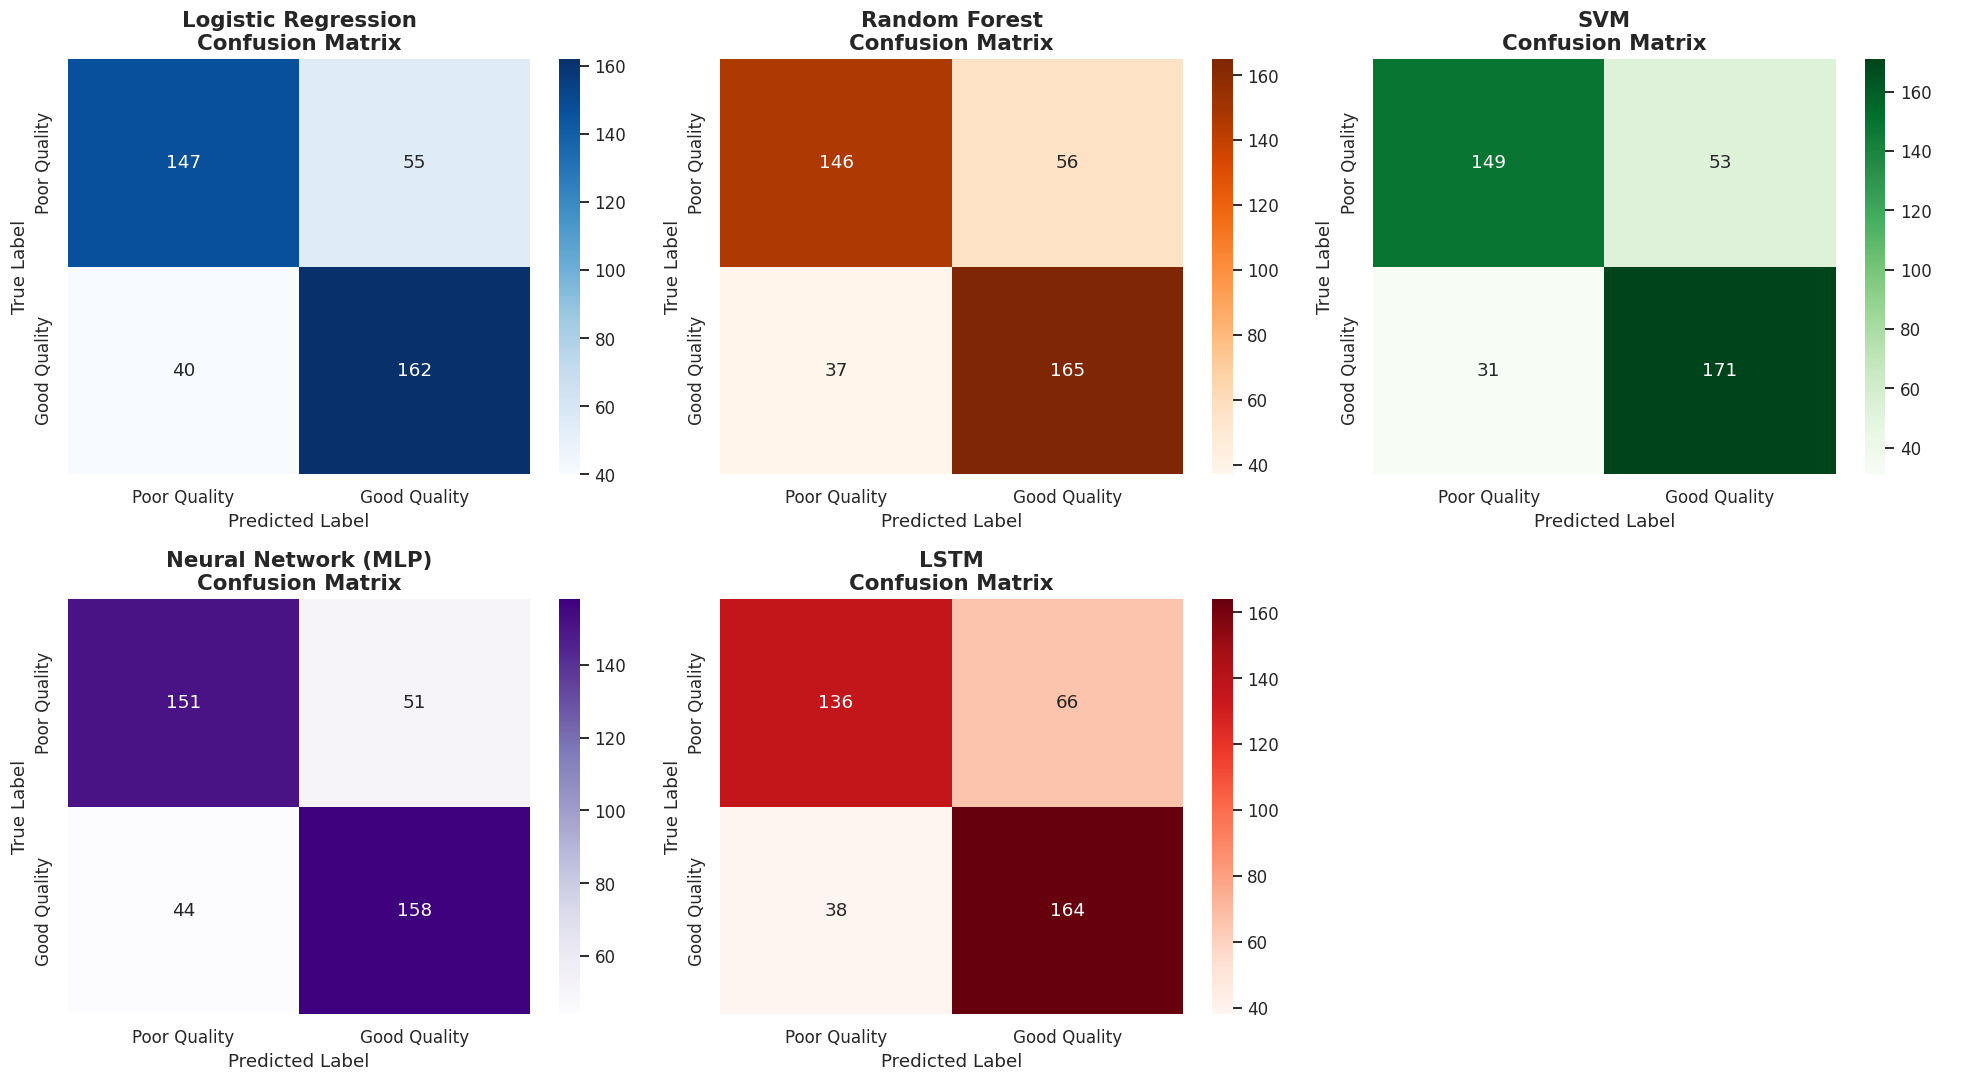

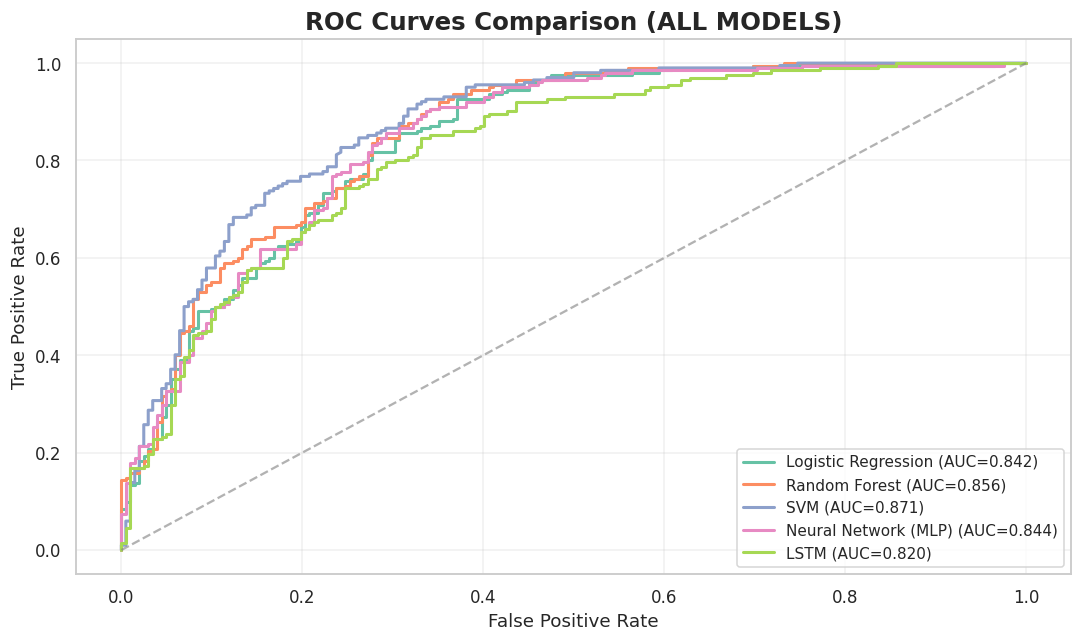

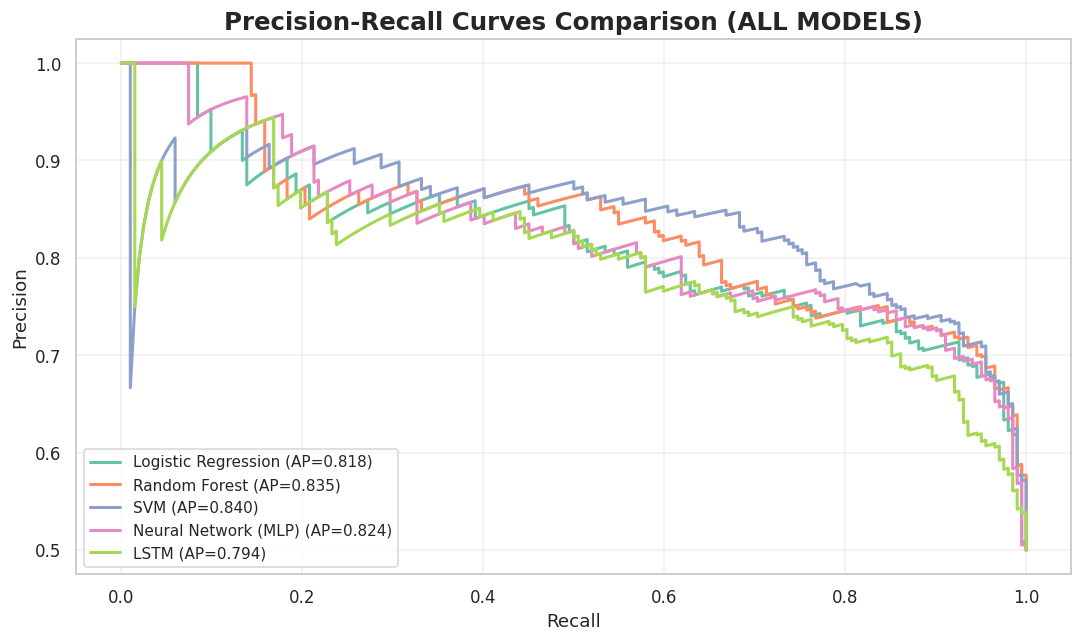

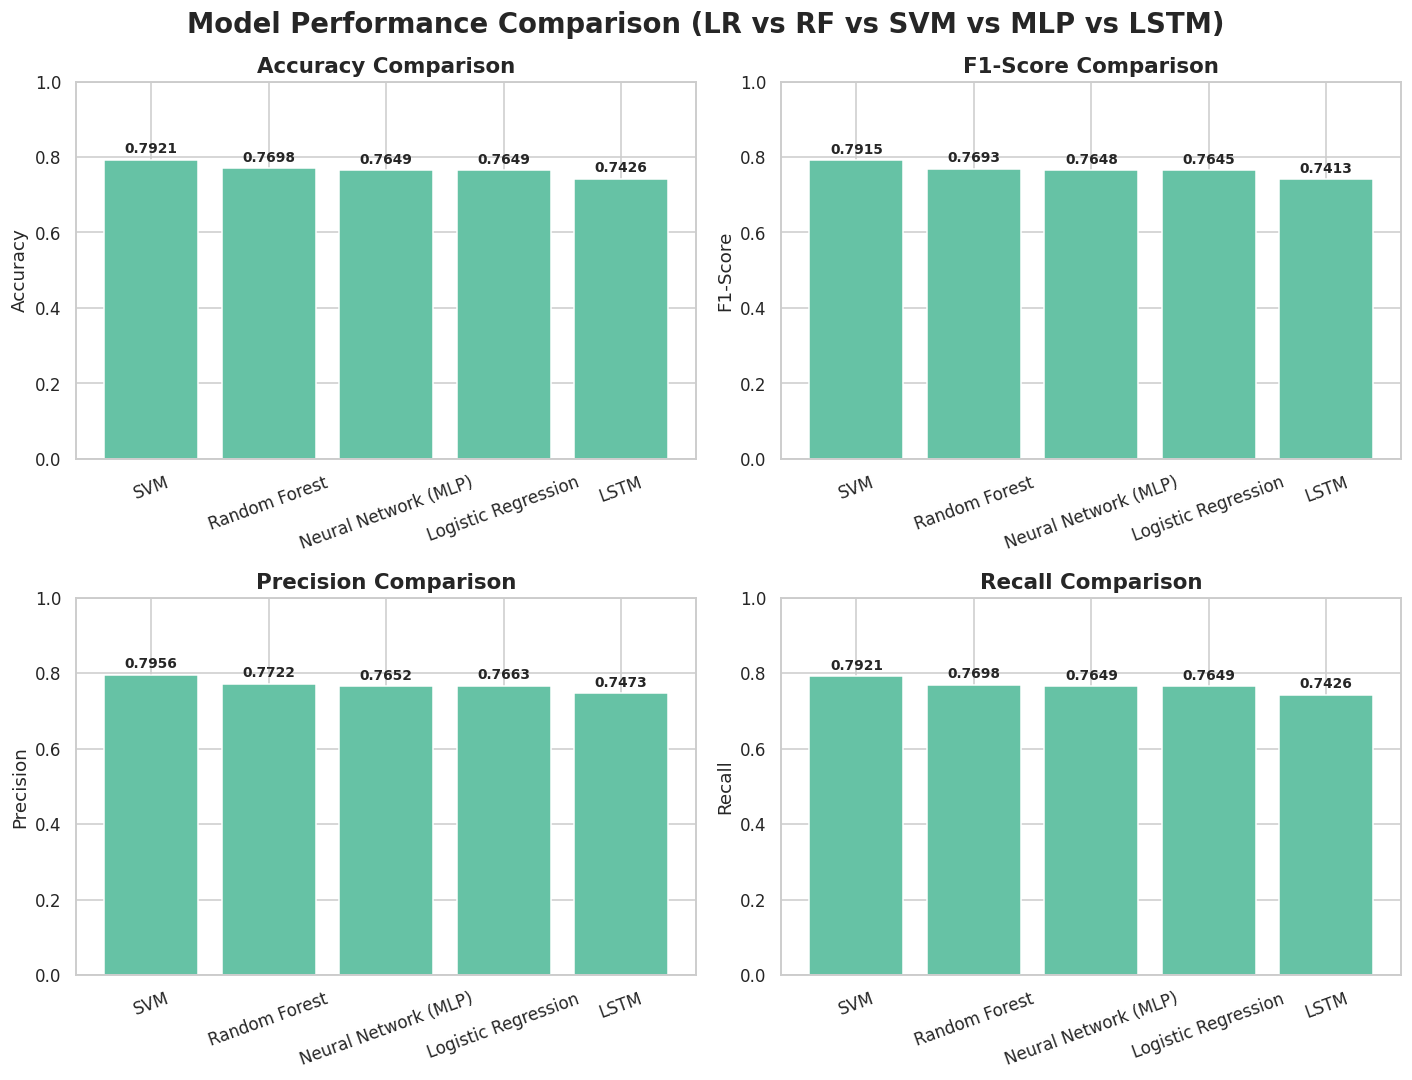


Best Model (by F1-Score): SVM

Classification Report:
              precision    recall  f1-score   support

Poor Quality     0.8278    0.7376    0.7801       202
Good Quality     0.7634    0.8465    0.8028       202

    accuracy                         0.7921       404
   macro avg     0.7956    0.7921    0.7915       404
weighted avg     0.7956    0.7921    0.7915       404



In [47]:
# ======================================================
# WINE QUALITY: ALL MODEL COMPARISON (+ LSTM)
# Models: Logistic Regression, Random Forest, SVM, Neural Network (MLP), LSTM
# Outputs: Metrics table + Confusion Matrices + ROC + PR + Bar charts
# ======================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    f1_score, precision_score, recall_score,
    roc_curve, auc,
    precision_recall_curve, average_precision_score
)

print("\n" + "="*75)
print("WINE QUALITY: ALL MODEL COMPARISON (LR vs RF vs SVM vs MLP vs LSTM)")
print("="*75)

# ------------------------------------------------------------
# STEP 1: Collect true labels + predictions from each model
# ------------------------------------------------------------
y_true = test_df["quality_label"].values

# You must already have:
# y_pred_lr,  y_prob_lr
# y_pred_rf,  y_prob_rf
# y_pred_svm, y_prob_svm
# y_pred_nn,  y_prob_nn
# y_pred_lstm,y_prob_lstm

def to_pos_prob(prob):
    """
    Ensure we always have probability for positive class (class 1).
    Handles shapes: (n,), (n,1), (n,2)
    """
    prob = np.array(prob)
    if prob.ndim == 2 and prob.shape[1] == 2:
        return prob[:, 1]
    if prob.ndim == 2 and prob.shape[1] == 1:
        return prob.ravel()
    return prob.ravel()

model_outputs = {
    "Logistic Regression": {"pred": y_pred_lr,   "prob": to_pos_prob(y_prob_lr)},
    "Random Forest":       {"pred": y_pred_rf,   "prob": to_pos_prob(y_prob_rf)},
    "SVM":                 {"pred": y_pred_svm,  "prob": to_pos_prob(y_prob_svm)},
    "Neural Network (MLP)": {"pred": y_pred_nn,  "prob": to_pos_prob(y_prob_nn)},
    "LSTM":                {"pred": y_pred_lstm, "prob": to_pos_prob(y_prob_lstm)},
}

class_labels = ["Poor Quality", "Good Quality"]


# ======================================================
# STEP 2: Metrics Table (Accuracy, F1, Precision, Recall)
# ======================================================
rows = []
for name, out in model_outputs.items():
    y_pred = out["pred"]

    rows.append({
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred, average="weighted", zero_division=0),
        "Precision": precision_score(y_true, y_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_true, y_pred, average="weighted", zero_division=0),
    })

comparison_df = (
    pd.DataFrame(rows)
    .sort_values(by="F1-Score", ascending=False)
    .reset_index(drop=True)
)

print("\nPerformance Metrics Comparison (ALL MODELS):")
print("-" * 75)
print(comparison_df.to_string(index=False))


# ======================================================
# STEP 3: Confusion Matrices (Auto grid)
# ======================================================
n_models = len(model_outputs)
n_cols = 3
n_rows = int(np.ceil(n_models / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = np.array(axes).reshape(-1)

cmaps = ["Blues", "Oranges", "Greens", "Purples", "Reds", "Greys"]

for i, (name, out) in enumerate(model_outputs.items()):
    cm = confusion_matrix(y_true, out["pred"])

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap=cmaps[i % len(cmaps)],
        xticklabels=class_labels,
        yticklabels=class_labels,
        ax=axes[i]
    )
    axes[i].set_title(f"{name}\nConfusion Matrix", fontsize=14, fontweight="bold")
    axes[i].set_xlabel("Predicted Label", fontsize=12)
    axes[i].set_ylabel("True Label", fontsize=12)

# turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


# ======================================================
# STEP 4: ROC Curve Comparison (ALL MODELS)
# ======================================================
plt.figure(figsize=(10, 6))

for name, out in model_outputs.items():
    fpr, tpr, _ = roc_curve(y_true, out["prob"])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray", alpha=0.6)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curves Comparison (ALL MODELS)", fontsize=16, fontweight="bold")
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# ======================================================
# STEP 5: Precision-Recall Curve Comparison (ALL MODELS)
# ======================================================
plt.figure(figsize=(10, 6))

for name, out in model_outputs.items():
    precision, recall, _ = precision_recall_curve(y_true, out["prob"])
    ap = average_precision_score(y_true, out["prob"])
    plt.plot(recall, precision, lw=2, label=f"{name} (AP={ap:.3f})")

plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision-Recall Curves Comparison (ALL MODELS)", fontsize=16, fontweight="bold")
plt.legend(loc="lower left", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# ======================================================
# STEP 6: Bar Charts (Accuracy, F1, Precision, Recall)
# ======================================================
fig, axes = plt.subplots(2, 2, figsize=(13, 10))
axes = axes.flatten()

metrics = ["Accuracy", "F1-Score", "Precision", "Recall"]

for idx, metric in enumerate(metrics):
    bars = axes[idx].bar(comparison_df["Model"], comparison_df[metric])
    axes[idx].set_title(f"{metric} Comparison", fontsize=14, fontweight="bold")
    axes[idx].set_ylabel(metric, fontsize=12)
    axes[idx].set_ylim([0.0, 1.0])
    axes[idx].tick_params(axis="x", rotation=20)

    for bar, val in zip(bars, comparison_df[metric]):
        axes[idx].text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.01,
            f"{val:.4f}",
            ha="center",
            va="bottom",
            fontsize=9,
            fontweight="bold"
        )

plt.suptitle("Model Performance Comparison (LR vs RF vs SVM vs MLP vs LSTM)",
             fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()


# ======================================================
# STEP 7: Print Best Model Full Report (by F1)
# ======================================================
best_model = comparison_df.iloc[0]["Model"]
print("\nBest Model (by F1-Score):", best_model)
print("\nClassification Report:")
print(classification_report(
    y_true,
    model_outputs[best_model]["pred"],
    target_names=class_labels,
    digits=4
))


In [44]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import GridspecLayout, Layout

# Assign the best model (SVM) to the 'model' variable and its corresponding scaler
model = svm
scaler_for_prediction = scaler_svm

feature_cols = X.columns.tolist()

mins = df[feature_cols].min()
maxs = df[feature_cols].max()
means = df[feature_cols].mean()

# Prepare input widgets
inputs = []
widgets_map = {}

# Define friendly descriptions for the features
feature_descriptions = {
    'fixed acidity': 'Fixed Acidity (g/L)',
    'volatile acidity': 'Volatile Acidity (g/L)',
    'citric acid': 'Citric Acid (g/L)',
    'residual sugar': 'Residual Sugar (g/L)',
    'chlorides': 'Chlorides (g/L)',
    'free sulfur dioxide': 'Free SO2 (mg/L)',
    'total sulfur dioxide': 'Total SO2 (mg/L)',
    'density': 'Density (g/cm³)',
    'pH': 'pH Level',
    'sulphates': 'Sulphates (g/L)',
    'alcohol': 'Alcohol (%)'
}

# Create a Grid for sliders
# Assuming about 11 features, we can arrange them in 2 columns
num_features = len(feature_cols)
rows = (num_features + 1) // 2  # Ceiling division

input_grid = GridspecLayout(rows, 2, width='700px', grid_gap='10px')

for i, col in enumerate(feature_cols):
    step = 1.0 if col in ["free sulfur dioxide", "total sulfur dioxide"] else 0.01
    slider = widgets.FloatSlider(
        value=float(means[col]),
        min=float(mins[col]),
        max=float(maxs[col]),
        step=step,
        description=feature_descriptions.get(col, col),
        orientation='horizontal',
        continuous_update=False,
        readout=True,
        readout_format='.2f',
        style={'description_width': 'initial'},
        layout=Layout(width='95%')
    )
    widgets_map[col] = slider
    row_idx = i // 2
    col_idx = i % 2
    input_grid[row_idx, col_idx] = slider

btn = widgets.Button(
    description="Predict Wine Quality",
    button_style="success",
    icon="check",
    layout=Layout(width='auto', flex='1 1 auto') # Make button responsive
)

output_box = widgets.Output(layout=Layout(border='1px solid lightgray', padding='10px', margin='10px 0'))

def predict(_):
    with output_box:
        clear_output()
        user_input = {c: widgets_map[c].value for c in feature_cols}
        X_input = pd.DataFrame([user_input], columns=feature_cols)

        # Scale the input features using the scaler corresponding to the selected model
        X_input_scaled = scaler_for_prediction.transform(X_input)

        pred = model.predict(X_input_scaled)[0]
        label = "Wine GOOD QUALITY (>= 7)" if pred == 1 else "WARNING POOR QUALITY (<= 6)"

        print(f"Prediction: {label}")

        if hasattr(model, "predict_proba"):
            prob = model.predict_proba(X_input_scaled)[0]
            print(f"Confidence --> Poor: {prob[0]*100:.1f}% | Good: {prob[1]*100:.1f}%")

        display(widgets.HTML(f"<h4>Input Features:</h4>"))
        display(X_input)

btn.on_click(predict)

display(widgets.HTML(
    """<div style='border-bottom: 2px solid #3070b4; padding-bottom: 10px; margin-bottom: 20px;'>"
    "<h2 style='color: #3070b4; text-align: center;'>Wine Quality Predictor</h2>"
    "<p style='text-align: center; font-size: 1.1em;'>Adjust the sliders below to predict if a wine is of <strong>Good Quality</strong> (score >= 7) or <strong>Poor Quality</strong> (score <= 6).</p>"
    "<p style='text-align: center; font-size: 0.9em; color: gray;'>Powered by our best performing <strong>SVM Model</strong>.</p>"
    "</div>"""
))
display(input_grid)
display(widgets.HBox([btn], layout=Layout(justify_content='center')))
display(output_box)

HTML(value='<div style=\'border-bottom: 2px solid #3070b4; padding-bottom: 10px; margin-bottom: 20px;\'>"\n   …

GridspecLayout(children=(FloatSlider(value=7.215621357398007, continuous_update=False, description='Fixed Acid…

Output(layout=Layout(border='1px solid lightgray', margin='10px 0', padding='10px'))